<a href="https://colab.research.google.com/github/Moostafaaa/Credit-Card-Fraud-Detection-and-Handling-Imbalanced-Data-with-Gen-AI/blob/main/main%20notebook%20for%20fraud%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this project, I will try different methods and approches to handle the imbalanced dataset. For now, the best method was SMOTEENN. I will try other methods and will update this section when I will find better method.**

### Business Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

This dataset is a bespoke dataset which contains transactions made by credit cards. This dataset contains transactions, where we have 180 frauds out of 4700 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 3.83% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. The input features are transformed to maintain the confidentiality of the original features and more background information about the data. Features PC1, PC2, … PC5 are the principal components obtained with PCA, the only feature which have not been transformed with PCA is 'ID' and 'Class'. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Here is a vary famous dataset on [fraud detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) which is available on Kaggle and similar to this dataset

### Loading libraries and dataset

In [1]:
# import libraries
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d mlg-ulb/creditcardfraud
! unzip creditcardfraud.zip



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 92% 61.0M/66.0M [00:00<00:00, 144MB/s]
100% 66.0M/66.0M [00:00<00:00, 124MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# import dataset
df = pd.read_csv('creditcard.csv')

### Exploring the dataset

In [13]:
# check the shape of dataset

df.shape

(284807, 31)

In [ ]:
# check head of the dataset

df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# check information about the dataset like - missing values, datatypes etc
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check the target class distribution
df.Class.value_counts()


,count
Class,
0,284315
1,492


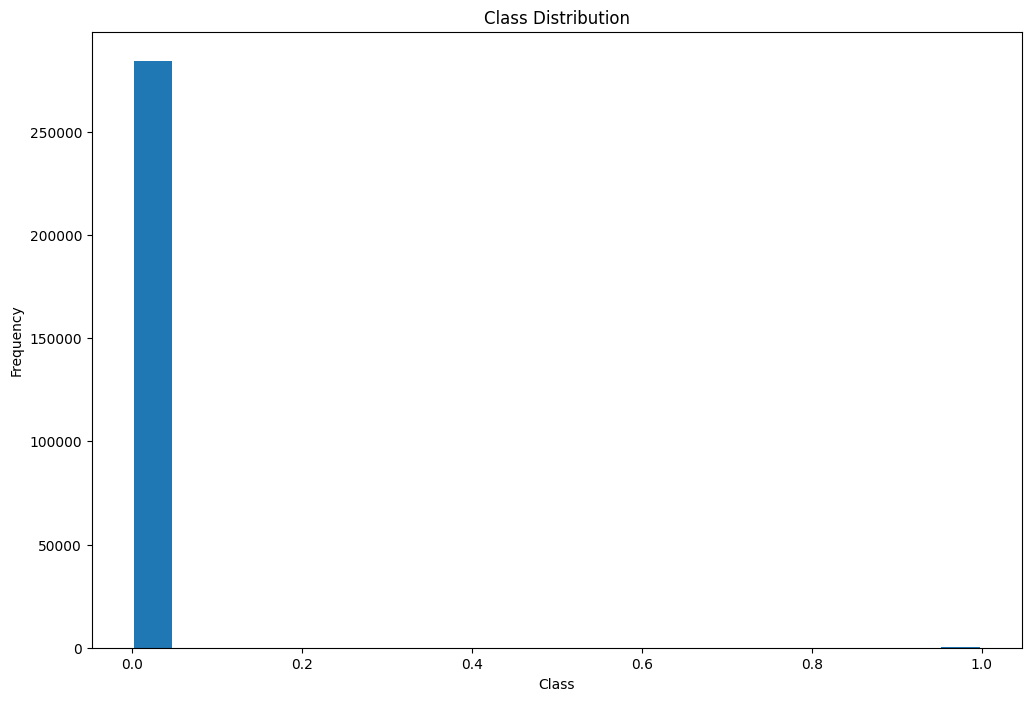

In [ ]:
# create a visual plot to see the target distribution
df.hist(column='Class', bins=20, grid=False, figsize=(12,8), rwidth=0.9)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

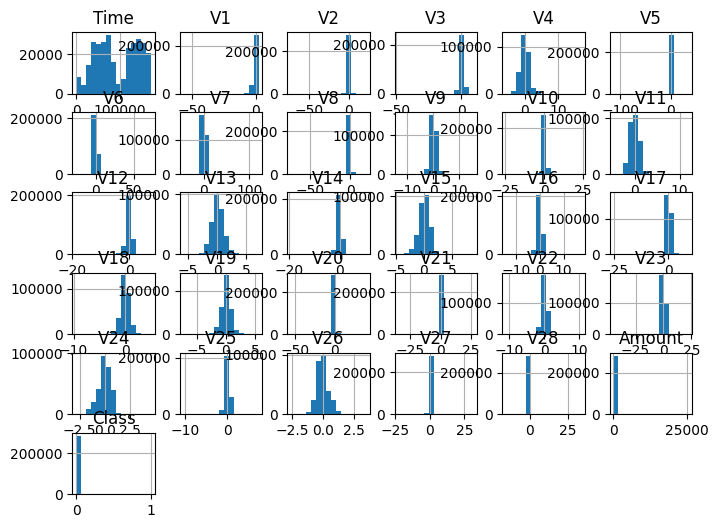

In [ ]:
# create some plots based on features and see if you can see some outliers in the data
df.hist(bins=15, figsize=(8, 6))


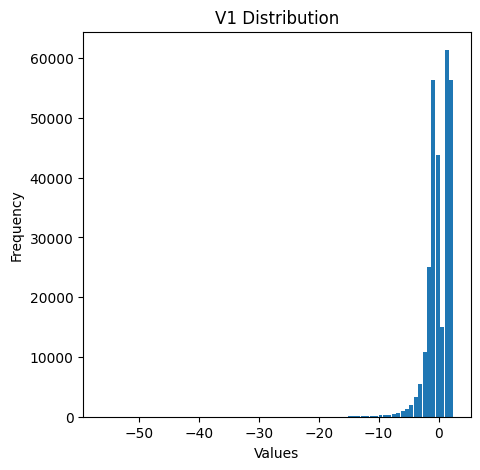

In [ ]:
# create a visual plot to see the target distribution
df.hist(column='V1', bins=80, grid=False, figsize=(5,5), rwidth=0.9)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V1 Distribution')
plt.show()


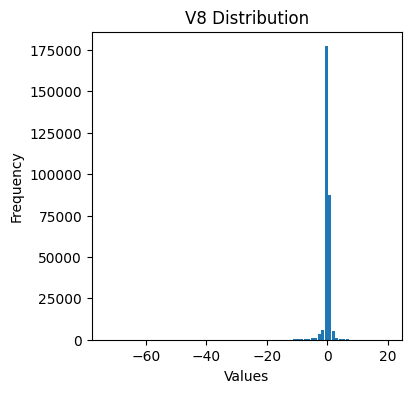

In [ ]:
# create a visual plot to see the target distribution
df.hist(column='V8', bins=80, grid=False, figsize=(4,4), rwidth=0.9)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V8 Distribution')
plt.show()


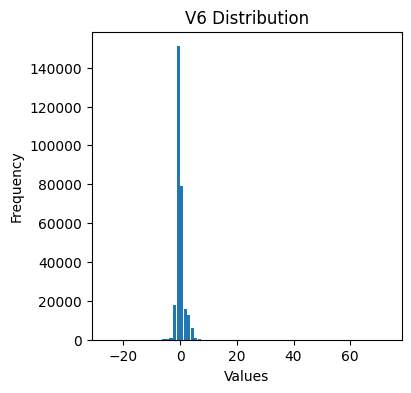

In [ ]:
# create a visual plot to see the target distribution
df.hist(column='V6', bins=80, grid=False, figsize=(4,4), rwidth=0.9)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V6 Distribution')
plt.show()


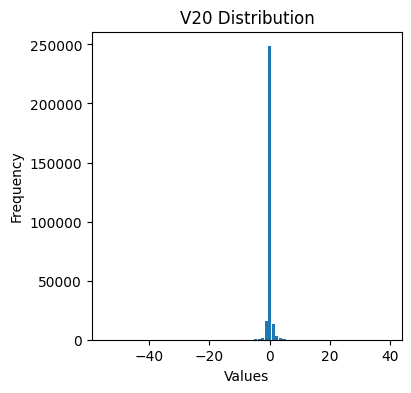

In [ ]:
# create a visual plot to see the target distribution
df.hist(column='V20', bins=80, grid=False, figsize=(4,4), rwidth=0.9)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V20 Distribution')
plt.show()


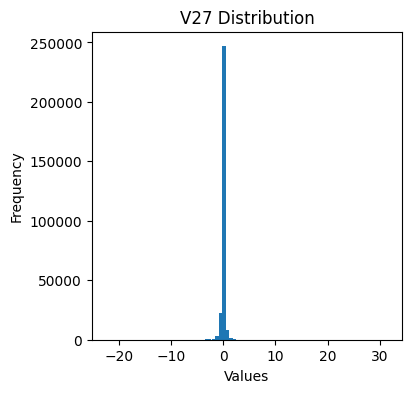

In [ ]:
# create a visual plot to see the target distribution
df.hist(column='V27', bins=80, grid=False, figsize=(4,4), rwidth=0.9)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V27 Distribution')
plt.show()


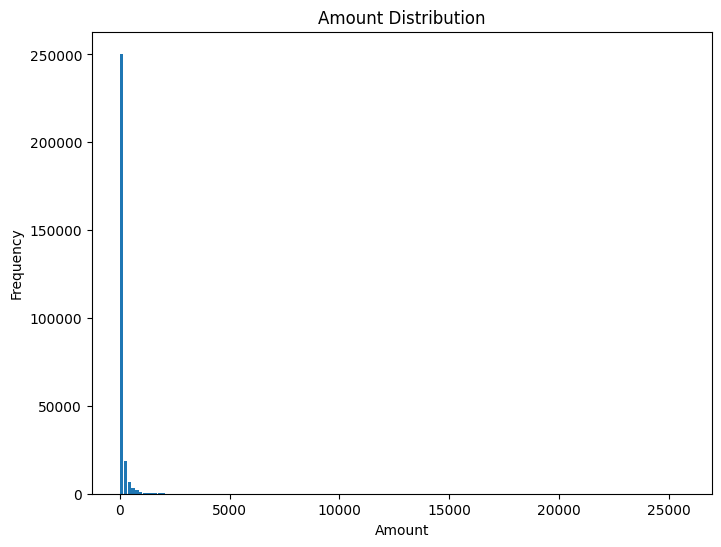

In [ ]:
# create a visual plot to see the target distribution
df.hist(column='Amount', bins=150, grid=False, figsize=(8,6), rwidth=0.9)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution')
plt.show()


### Evaluation metric selection

In [ ]:
# baseline accuracy of the model

round(df['Class'].value_counts(normalize=True) * 100, 3)

Class
0    99.827
1     0.173
Name: proportion, dtype: float64

For this dataset let's consider fraudulent transactions (which are denoted as 1 in the dataset) is `positive` class and the non fraudulent transactions (which are denoted as 0 in the dataset) is `negative` class.

- TP - transactions which are actually fraudulent and the model also able correctly identify them as fraudulent transactions
- FP - transactions which are actually non fraudulent transactions but the model is predicting them as fraudulent transactions
- TN - transactions which are actually non fraudulent transactions and model is also predicting them as non fraudulent transactions
- FN - transactions which are actually fraudulent but the model is predicting them as non fraudulent transactions

$$recall = \frac{TP}{TP + FN}$$

$$precision = \frac{TP }{TP+ FP}$$

### Baseline model

In [ ]:
# drop the Time variable as it does not have any meaningful information about the data
indata = df.drop('Time', axis=1)
indata = df.reset_index(drop=True)
X = indata.drop('Class', axis=1)
y = indata['Class']


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# split the dataset into trainig and test set to train and evaluate the model respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# create a model
rf = RandomForestClassifier(random_state=42)

In [ ]:
model = rf.fit(X_train_scaled, y_train)

In [ ]:
# predict for the test dataset
preds = model.predict(X_test_scaled)

<Axes: >

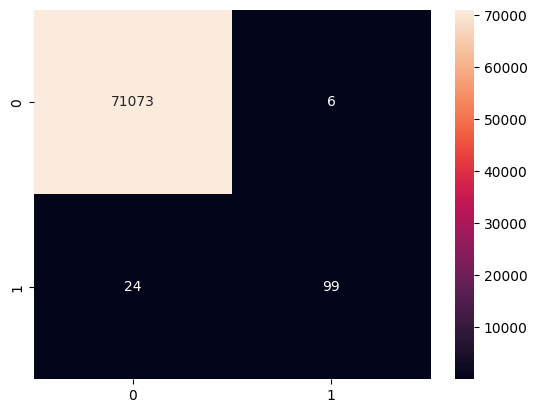

In [ ]:
# plot the confusion matrix
confusion_matrix(y_test, preds)
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')

In [ ]:
# plot the confusion matrix
confusion_matrix(y_test, preds)


array([[71073,     6],
       [   24,    99]])

In [ ]:
# print the classification report
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.80      0.87       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



### Resampling techniques for imbalanced data

The imbalanced datasets are generally biased towards the majority class of the target variable. In this case the majority class is non fraudulent transactions and the minority class is fraudulent transactions. Hence if we don't balance these two classes the machine learning algorithms will be biased towards the majority class. Therefore it becomes important to balance the classes present in target variables. There are two ways in which we can balance these two categories -

- **Undersampling**: In undersampling we randomly select as many observations of majority class as we have for minority class to make both of these classes balanced
- **Oversampling**: In oversampling, we create multiple copies of minority class to have same number of observations as we have for majority class. Here also we can oversampling in two ways -
    - **Minotiy Oversampling**: here we create duplicates of same data from minority class
    - **SMOTE (Synthetic Minority Oversampling Technique)**: here we create observations for the minority class, based on those that already exist. It randomly picks a point from the minority class and computes the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

**To prevent Data Leakage, We will apply the resampling techniques on the splitted data X_train and y_train.**

#### Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# import imblearn library and resample the original data using SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)



In [ ]:
X_train_smote.shape, y_train_smote.shape

((426472, 30), (426472,))

In [ ]:
y_train_smote.value_counts()

,count
Class,
0,213236
1,213236


In [ ]:
# train a random forest model on SMOTE data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)



RandomForestClassifier(random_state=42)

In [ ]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix
preds_smote = rf_smote.predict(X_test_scaled)
confusion_matrix(y_test, preds_smote)



array([[71063,    16],
       [   23,   100]])

In [ ]:
# print the classification report
print(classification_report(y_test, preds_smote))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.81      0.84       123

    accuracy                           1.00     71202
   macro avg       0.93      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



#### **---------SMOTENN-------------**

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train_scaled, y_train)

In [ ]:
y_res.value_counts()

Class
1    213236
0    212737
Name: count, dtype: int64

In [ ]:
# train a random forest model on SMOTE data
rf_smoteenn = RandomForestClassifier(random_state=42)
rf_smoteenn.fit(X_res, y_res)
preds_smoteenn = rf_smoteenn.predict(X_test_scaled)
confusion_matrix(y_test, preds_smoteenn)




array([[71054,    25],
       [   22,   101]])

In [ ]:
print(classification_report(y_test, preds_smoteenn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.82      0.81       123

    accuracy                           1.00     71202
   macro avg       0.90      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202



**SMOTE-Tomek Implementation**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [ ]:
# Apply SMOTE
smt = SMOTE(random_state=42)
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

# Apply Tomek Links
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_smt, y_smt)


In [ ]:
y_resampled.value_counts()

,count
Class,
0,213236
1,213236


In [ ]:
# train a random forest model on SMOTE data
rf_tomek = RandomForestClassifier(random_state=42)
rf_tomek.fit(X_resampled, y_resampled)

# Predict
preds_tome = rf_tomek.predict(X_test_scaled)
confusion_matrix(y_test, preds_tome)




array([[71063,    16],
       [   23,   100]])

**Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)

# Fit and resample the data
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
# train a random forest model on SMOTE data
rus_model = RandomForestClassifier(random_state=42)
rus_model.fit(X_rus, y_rus)

# Predict
preds_rus = rf_tomek.predict(X_test_scaled)
confusion_matrix(y_test, preds_rus)




array([[71063,    16],
       [   23,   100]])

#### **Model Selection**

In [ ]:
xtrain = X_res
ytrain = y_res
xtest = X_test_scaled
ytest = y_test

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import (LogisticRegression, RidgeClassifier)
from sklearn.neighbors import NearestCentroid



In [ ]:
extra = ExtraTreesClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42)
ridge = RidgeClassifier(random_state=42)
nearest = NearestCentroid()

In [ ]:
models = [extra, log_reg, ridge, nearest]
for model in models:
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    print(model)
    print(confusion_matrix(ytest, preds))
    print(classification_report(ytest, preds))

ExtraTreesClassifier(random_state=42)
[[71053    26]
 [   21   102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.83      0.81       123

    accuracy                           1.00     71202
   macro avg       0.90      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)
[[69313  1766]
 [   14   109]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

RidgeClassifier(random_state=42)
[[70131   948]
 [   22   101]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.10      0.82      0.17       123

    accuracy                           0.99     71202
   macro avg       0.55      0.90      0.58     71202
weighted avg       1.00      0.99      0.99     71202

NearestCentroid()
[[71060    19]
 [   32    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.74      0.78       123

  

In [ ]:
# Hyperparameters Tuning for Logistic Regression
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}



In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model
log_reg = LogisticRegression()

# Create a GridSearchCV object with recall as scoring metric
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='recall', cv=5)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.9378528932447878


In [ ]:
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)

In [ ]:
log_reg = LogisticRegression(random_state=42, C=100, penalty='l2', solver='liblinear')
log_reg.fit(xtrain, ytrain)
y_pred = log_reg.predict(xtest)

In [ ]:
confusion_matrix(ytest, y_pred)

array([[69311,  1768],
       [   14,   109]])

In [ ]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



### Computing ROC AUC Curve

By defualt, every machine learning algorithm uses a probability threshold of 0.5 to classify between positive and negative classes. If we can tune this probability threshold to some other values which increases the true positive rate then we will be able to increase the recall for fraudulent transactions.

To do that we need to compute the AUC score. The AUC score signifies that the probability value of a random observation from the positive class (i.e. fraudulent transactions) is larger than the probability value of another random observation from the negative class (i.e. non fraudulent transactions). AUC value of 1 means all the predicted positive (fraudulent) transactions have higher probabilites of being fraudulent than the non fraudulent transactions, which is an ideal case.

In [33]:
import scipy

In [ ]:
! pip uninstall scipy==1.13.1

Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.11.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.11.4


In [32]:
# !pip uninstall scipy -y  # Forcefully remove any existing SciPy installation
!pip install scipy==1.11.4 # Install the desired SciPy version


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 957.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.


In [34]:
print(scipy.__version__)

1.13.1


In [156]:
! pip install plot-metric

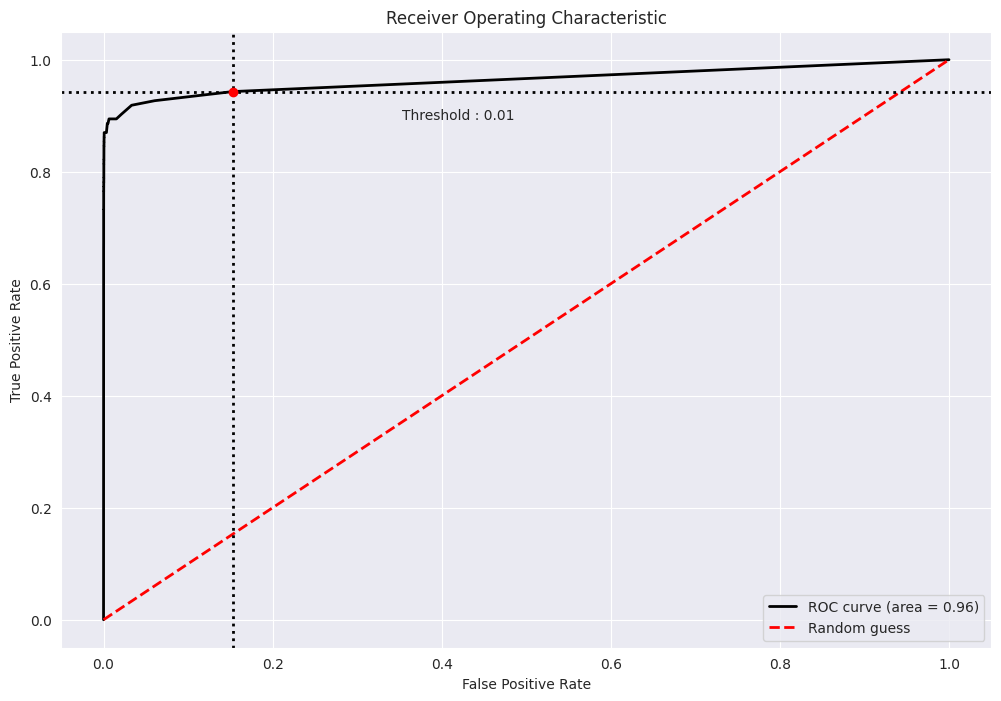

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve
from plot_metric.functions import BinaryClassification
BC = BinaryClassification(y_test, rf_smoteenn.predict_proba(X_test_scaled)[: , 1],threshold=0.01 ,labels=[0,1] )
plt.figure(figsize=(12, 8))
BC.plot_roc_curve()
plt.show()


### Adjusting probability threshold

In [ ]:
# compute the probabilites of test observations using rf_smote model

y_pred_prob = log_reg.predict_proba(xtest)[:, 1]


In [ ]:
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_labels = (y_pred_prob >= 0.06)
len(y_labels)



71202

[[53468 17611]
 [    5   118]]


<Axes: >

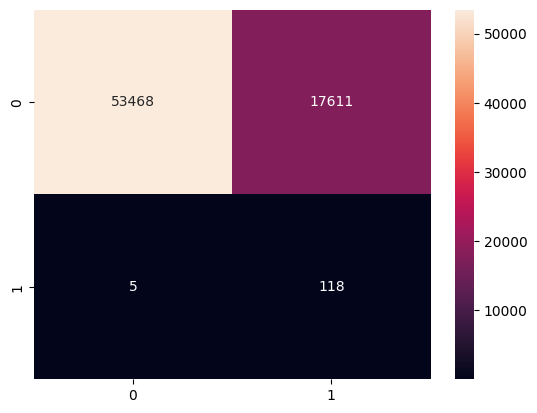

In [ ]:
# plot the confusion matrix

print(confusion_matrix(ytest, y_labels))
sns.heatmap(confusion_matrix(ytest, y_labels), annot=True, fmt='d')



In [ ]:
# print the classification report
print(classification_report(ytest, y_labels))



              precision    recall  f1-score   support

           0       1.00      0.75      0.86     71079
           1       0.01      0.96      0.01       123

    accuracy                           0.75     71202
   macro avg       0.50      0.86      0.44     71202
weighted avg       1.00      0.75      0.86     71202



# Different Approach Using Data Generated Using GAN Model

In [4]:
# Importing dataset generated by GAN Model , you can find the notebook for GAN in this repo

df_synthetic = pd.read_csv('synthetic_data_scaled.csv')

In [5]:
df_synthetic

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,label
0,-1.042182,1.345320,-0.933320,2.523743,-0.358913,-0.987572,-2.292097,2.554779,-2.192050,-2.708199,...,1.318031,-0.039062,-1.466996,0.351615,0.041814,0.404938,1.604864,-1.177385,-0.307413,real
1,-1.369244,-2.298262,0.473840,1.450074,1.084860,-0.677575,0.253862,-0.168201,-0.177002,-0.753697,...,1.666327,0.400312,4.482102,-0.421576,0.394101,-0.164143,-1.569730,0.186837,7.084469,real
2,-1.038212,1.207868,-0.281395,1.476204,-0.588630,0.170028,0.464394,-0.786425,-0.150636,-1.447916,...,-0.638221,-0.876991,0.594269,-0.161571,-0.258599,-0.863634,0.236118,-1.251699,3.045204,real
3,-1.974979,0.921989,-1.445947,1.695769,-0.823764,-1.227524,-3.144742,-0.505873,-0.158308,-4.759412,...,1.453869,0.158918,-1.373279,-0.118973,0.353085,-1.065875,-5.117705,6.387772,0.517013,real
4,0.543881,2.106760,-2.338619,2.985363,2.821995,-0.928610,1.488061,-0.967799,-0.992899,-2.379900,...,-0.842916,-0.663890,-2.086061,-2.107546,2.204514,1.089799,-0.070163,1.032834,-0.293440,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,-0.447111,-0.198251,-1.978541,1.000730,0.273107,-1.235385,-1.468876,-3.562817,1.699303,0.431728,...,-1.248004,-1.070563,-3.634939,2.182830,-3.752635,2.182087,-2.112959,-1.694368,-0.900628,synthetic
10488,0.664721,0.197038,-2.912716,0.950058,-1.408998,0.819649,-1.393534,-1.250600,2.639256,0.920023,...,-2.454885,-1.216193,-3.156173,2.883500,-3.981182,1.142501,-3.675872,-1.309798,0.607318,synthetic
10489,-1.252016,-1.142206,0.886877,-1.560335,3.176343,0.133851,3.132071,-1.985992,4.578882,2.444969,...,-1.971308,-2.293726,-0.321301,-0.064593,-0.069800,-3.452193,1.250965,-0.733440,1.781248,synthetic
10490,1.600962,2.714185,-2.987850,2.124966,-2.238366,-0.681512,-4.181395,5.377349,-2.617460,-6.139466,...,1.818992,1.485728,1.397381,0.626595,1.657685,1.451358,4.466401,2.436209,3.400095,synthetic


## **Creating the training and test data WITHOUT Data Leakage. **

In [8]:
# extract only synthetic rows
df_synthetic = df_synthetic[ df_synthetic.label == 'synthetic' ]
df_synthetic = df_synthetic.reset_index(drop=True)

In [6]:
df = df.drop('Time', axis=1)

In [7]:
# split the dataset into trainig and test set

x = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


**Notice that we separated the test data then re-join the data from synthetic dataframe and the original dataframe and balancing the training dataset**

In [9]:
# extracting the frauds and NOT frauds
X_train["Class"] = y_train
df_sample_0 = X_train[X_train.Class == 0]
df_sample_1 = X_train[X_train.Class == 1]

In [10]:
df_sample_0.shape, df_sample_1.shape

((213226, 30), (379, 30))

In [11]:
df_synthetic['label'] = 1

In [12]:
df_sample_1.columns = df_synthetic.columns

In [13]:
df_sample_0.columns = df_synthetic.columns

In [16]:
df_sample_1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,label
172787,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,-4.820779,...,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,144.62,1
15166,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,...,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
15539,-22.561699,13.208904,-24.643819,6.232532,-16.905611,-4.497439,-16.810184,14.955107,-3.871297,-8.581266,...,1.765987,-1.635517,-0.998317,0.138972,1.559350,-0.222125,1.504425,0.445920,99.99,1
8335,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.00,1
151011,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,-5.969782,-17.141514,...,-3.474097,1.765446,1.701257,0.381587,-1.413417,-1.023078,-2.634761,-0.463931,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
182992,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
154697,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59,1


In [17]:
# create new dataframe samples of same number as synthetic data 10379
df_sample_0 = df_sample_0.sample(n=10379).reset_index(drop=True)
df_sample_1 = df_sample_1.sample(frac=1).reset_index(drop=True)
df_sample = pd.concat([df_sample_1,df_sample_0],ignore_index=True)
df_sample = df_sample.sample(frac=1).reset_index(drop=True)

In [18]:
df_sample_x = df_sample.drop('label', axis=1)

In [19]:
X_test.columns = df_sample_x.columns

In [20]:
# Using Robust Scaler on Original Dataframe as well as it has been used with GAN model
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_real = scaler.fit_transform(df_sample_x)
df_real = pd.DataFrame(df_real)
df_real['label'] = df_sample['label']
df_real.columns = df_synthetic.columns

x_test = scaler.transform(X_test)


df_train = pd.concat( [ df_real , df_synthetic], ignore_index=True)


In [21]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [22]:
df_train.label.value_counts()

,count
label,
0,10379
1,10379


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [24]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [28]:
rf_gen = RandomForestClassifier(random_state=42)
rf_gen.fit(X_train, y_train)
preds = rf_gen.predict(x_test)
print(rf_gen)
print(confusion_matrix( y_test, preds))
print(classification_report( y_test, preds))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(random_state=42)
[[70953   136]
 [   14    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.42      0.88      0.57       113

    accuracy                           1.00     71202
   macro avg       0.71      0.94      0.78     71202
weighted avg       1.00      1.00      1.00     71202



## **ROC AUC Curve**

In [29]:
from sklearn.metrics import roc_auc_score

# Assuming y_true are the true labels (0 or 1)
# and y_pred_proba are the predicted probabilities
y_pred_proba = rf_gen.predict_proba(x_test)[: , 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


AUC: 0.9755298014193102


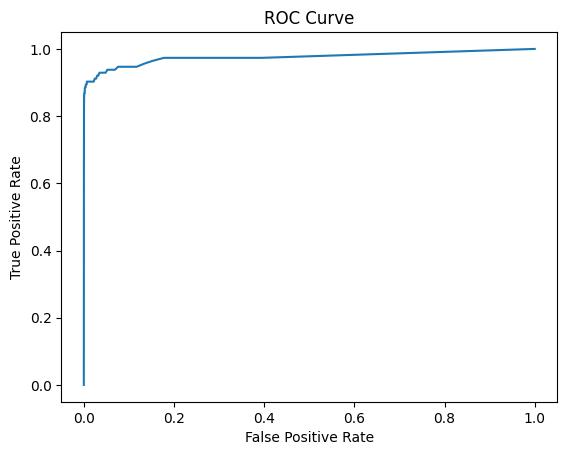

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[61619  9470]
 [    5   108]]


<Axes: >

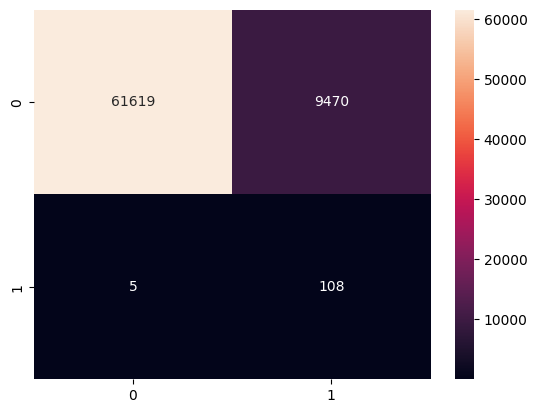

In [36]:
# plot the confusion matrix

y_labels = (y_pred_proba >= 0.06)
len(y_labels)

print(confusion_matrix(y_test, y_labels))
sns.heatmap(confusion_matrix(y_test, y_labels), annot=True, fmt='d')

